In this notebook, we will introduce the basics of classification problem. The data we use for this demo is the ["Iris flower data set"](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset contains a set of 150 records under 5 attributes - Petal Length , Petal Width , Sepal Length , Sepal width and Class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

## Reading data from files

If the data is stored as csv (comma-separated values) format, it can be directly imported with the `read_csv` function provided by `pandas`.

In [2]:
df = pd.read_csv('Iris-data.csv')

Here the spreadsheet is read into Python as a `pandas.DataFrame` object, which has some convenient methods (functions) for data analytics.

We can take a quick look at the data by using the `head` or `tail` method, which shows the first or last rows of the data frame.

In [3]:
df.head()

,a1,a2,a3,a4,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


In many other cases, the data files are stored as Excel spreadsheets. In that case, just use the `read_excel` function instead. For instance:

```python
df = pd.read_excel('Iris-data.xls')
```

## Explore data

Some exploration is usually required before training any machine learning models. Some basic questions include:

* How large is the data set?
* How many features (attributes)? What is the distribution of each feature?
* What is the distribution of class labels? Are the labels imbalanced?

The size of the data table can be accessed with the `shape` attribute of data frame:

In [4]:
df.shape

(150, 6)

It shows us that the data set has 150 measurements. It also has a useless column "id". The column can be removed by the `drop` method:

In [5]:
df.drop('id', axis=1, inplace=True)
df.head()

,a1,a2,a3,a4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Distribution of features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B93978>,
      dtype=object)

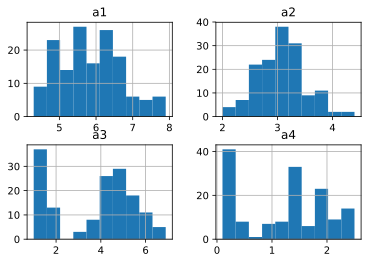

In [6]:
df.hist(bins=10)

The `describe` method provides useful statistical information of the data set:

In [7]:
df.describe()

,a1,a2,a3,a4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For categorical feature or label, we can count the numbers for each category by:

In [8]:
df.label.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: label, dtype: int64

It shows that the label is ideally distributed, with 3 perfectly balanced classes.

## Build the first model

The data is already in a very good quality so there is not much data cleaning to do. With the data ready, let's build the first machine learning model.

First define a classifier object. We will be using the decision tree algorithm:

In [9]:
X = df.values[:, :4]
y = df.label.values

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
pred = clf.predict(X)
accuracy_score(y, pred)

1.0

Wow! The score is 100%. Does that mean we have the perfect model? The answer is NO.

Notice that in the above, we have trained our model on the whole data set, and then used *the same data* for validation. This almost always leads to over-fitting, because we can simply remember all the labels of the training data and get perfect score, but at the same time have no extendability to unseen data at all.

The correct way, is to separate the data into two parts, usually called the training set and test set. Use the training set for training the model, and then use the test set to validate the model.

## Correctly train ML model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

This time the results seem to be much more reasonable.

A more common way is to train the model via ["cross validation"](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). The cross-validation score can be conveniently obtained by:

In [14]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=3)

array([0.98039216, 0.92156863, 0.97916667])